In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils.signal_utils import DCFilter, Notch, Bandpass
from utils.visualize import showMe
%matplotlib inline

%load_ext autoreload
%autoreload 2

subject = 'Debug'
session = "session_02"


In [13]:
path = os.path.join('data', subject, session)
files = os.listdir(path)
classes = [f.split('.')[0] for f in files]
data = {}
for file in files:
    clas = file.split('.')[0]
    data[clas]=np.load(os.path.join(path, file))


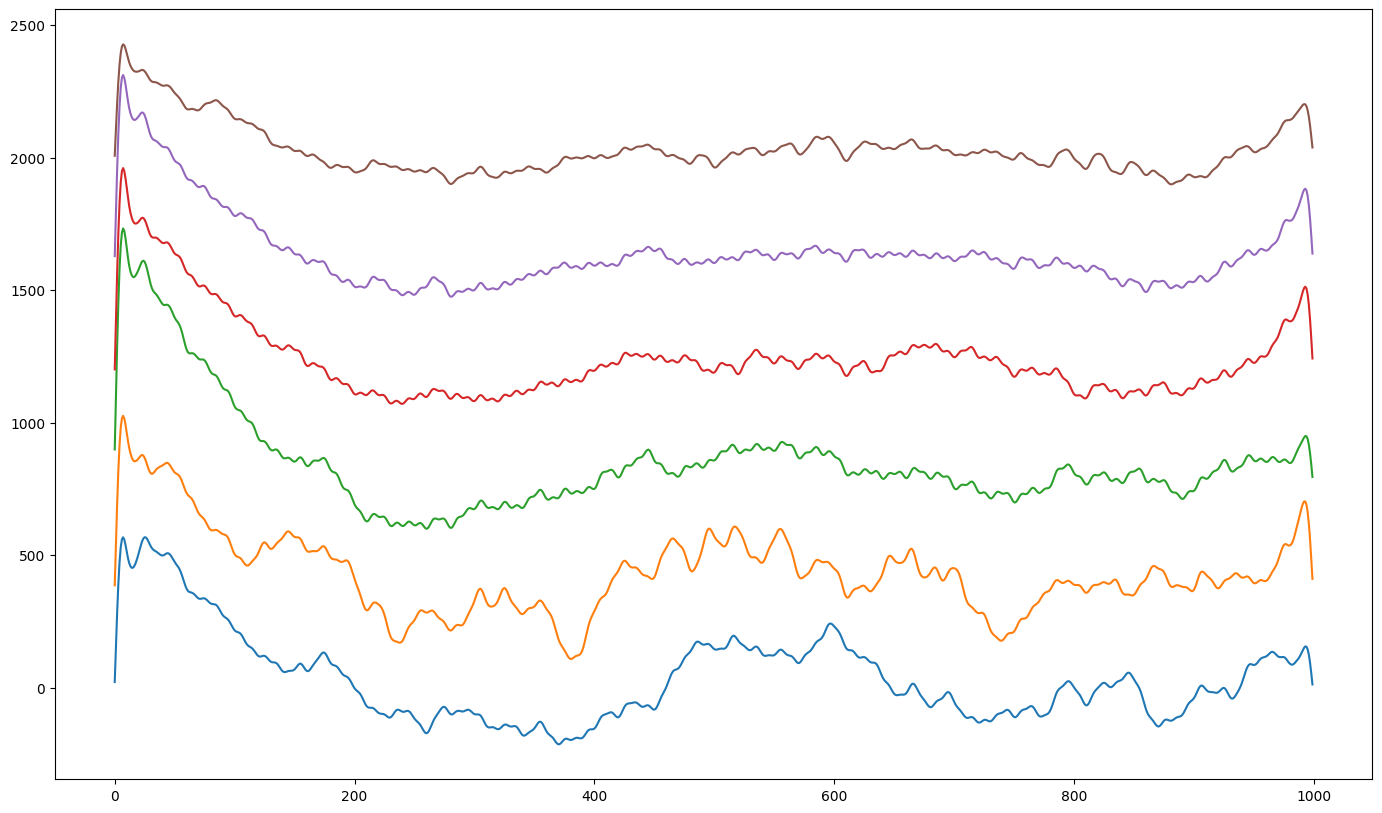

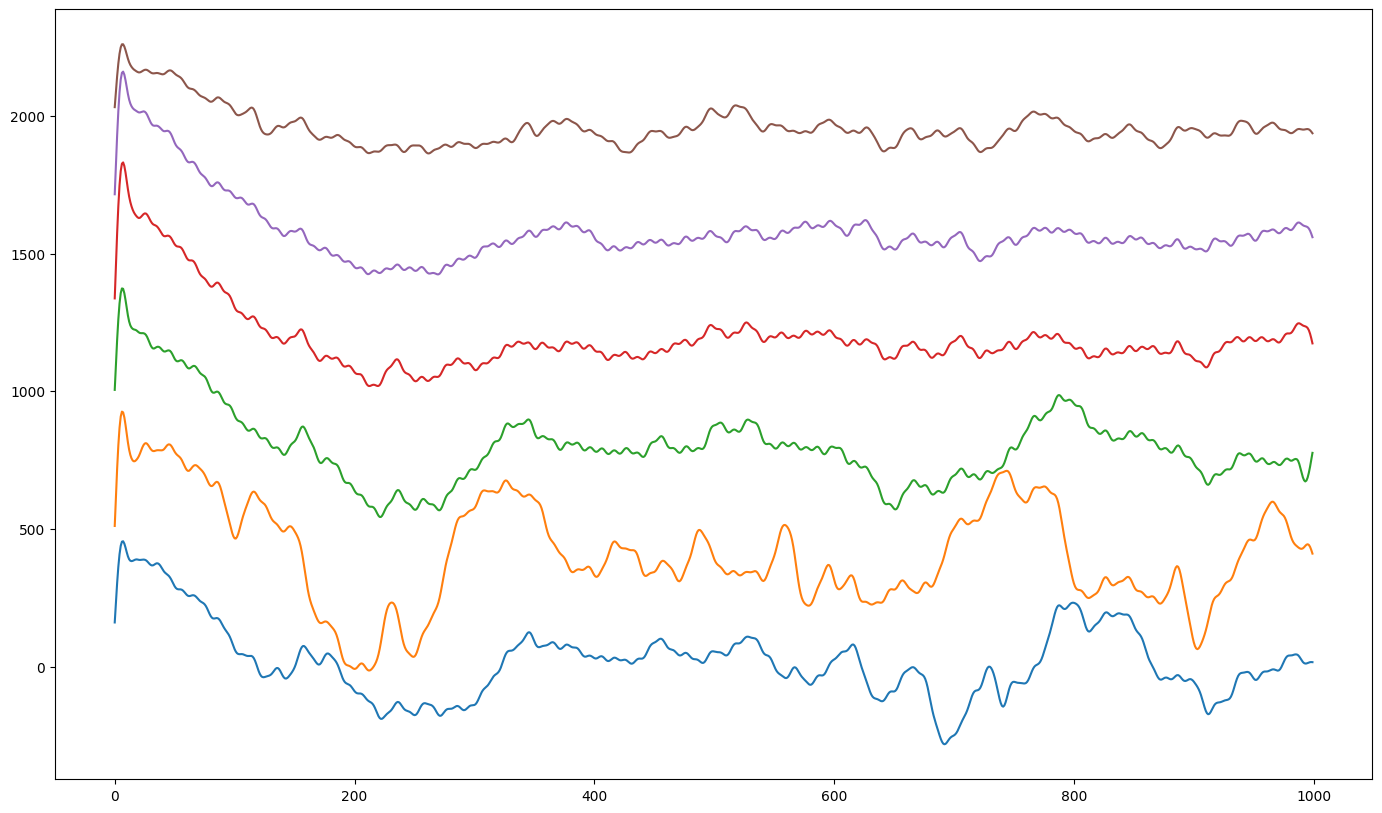

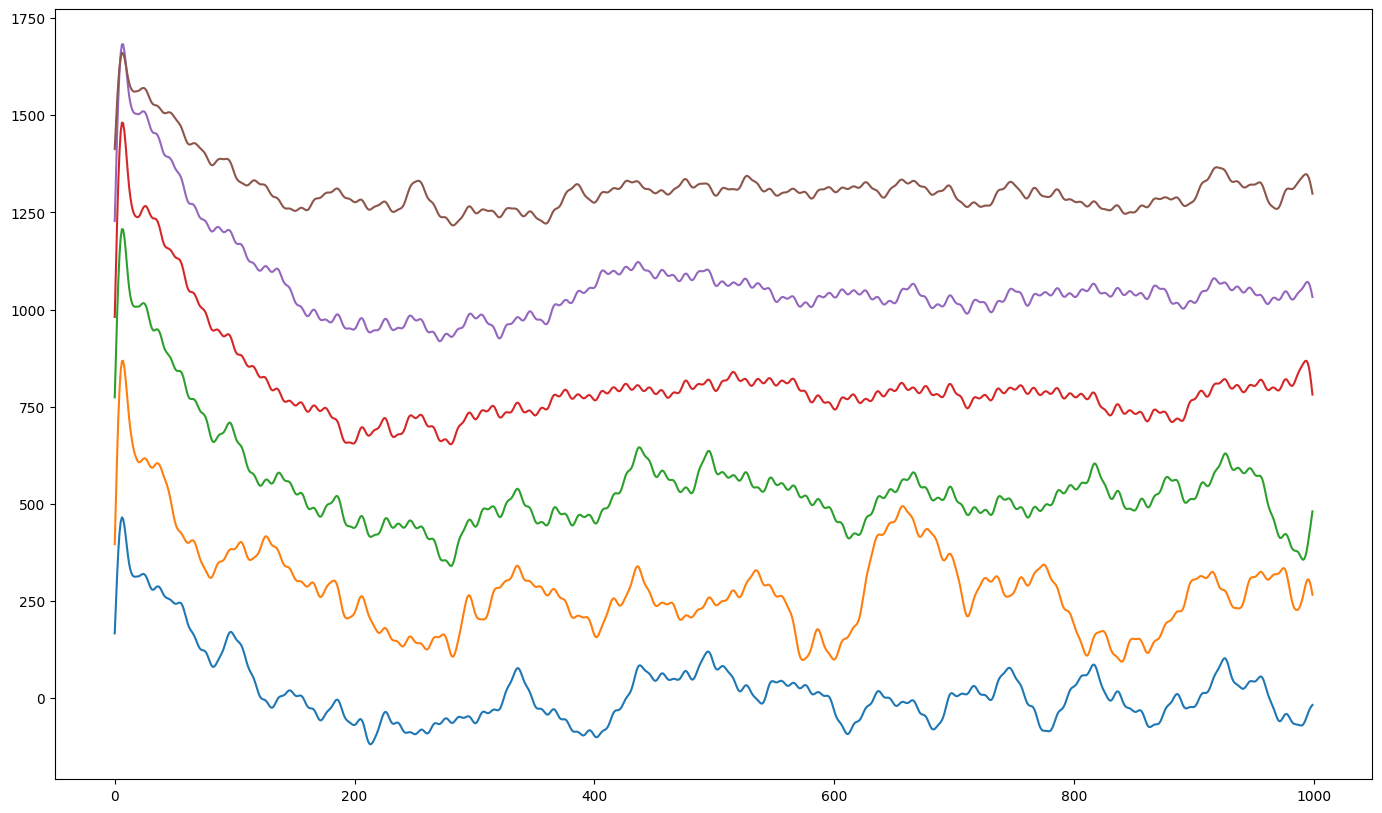

In [20]:
for c in classes:
    cdata = data[c]

    cdata = Bandpass(cdata, 1, 30)
    cdata = Notch(cdata)
    cdata = Notch(cdata, 60)

    # data = DCFilter(data)
    for sample in cdata:
        showMe(sample)

In [ ]:
sample = pd.read_csv('bandpass_1-60_notch50_v2.csv')
sample.head()
sample = sample.values[-500:,0:8]
sample.shape
showMe(sample.T)